In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [93]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [94]:
data_raw_train = pd.read_csv("/content/drive/MyDrive/lab2_mai_ml/train_c.csv")
data_raw_test = pd.read_csv("/content/drive/MyDrive/lab2_mai_ml/test_c.csv")
test_ids = data_raw_test['ID']

In [95]:
data_raw_train.head(15)

,ApplicationDate,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,MonthlyDebtPayments,...,JobTenure,EmploymentStatus,EducationLevel,Experience,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved
0,2010-06-26,27.0,66829.0,549.0,17290.0,60.0,Divorced,1.0,Rent,1095.0,...,4.0,Employed,Associate,4.0,35067.0,0.257790,0.251465,508.970230,0.288013,0.0
1,1996-09-23,55.0,172147.0,850.0,16110.0,36.0,Widowed,1.0,Mortgage,211.0,...,2.0,Employed,High School,33.0,27001.0,0.086110,0.093173,514.675859,0.050585,1.0
2,2015-01-19,51.0,300000.0,850.0,38436.0,36.0,Married,0.0,Mortgage,546.0,...,3.0,Employed,Bachelor,28.0,278382.0,0.108436,0.115443,1268.276385,0.072571,1.0
3,1981-05-12,25.0,34683.0,847.0,19186.0,48.0,Married,0.0,Other,153.0,...,3.0,Employed,High School,0.0,9224.0,0.100686,0.112822,498.505187,0.225415,1.0
4,1995-05-07,55.0,300000.0,850.0,30437.0,48.0,Single,2.0,Rent,562.0,...,5.0,Employed,Bachelor,31.0,4502.0,0.110437,0.089037,756.035156,0.052721,1.0
5,1997-05-12,21.0,15000.0,300.0,29786.0,48.0,Single,4.0,Rent,457.0,...,4.0,Self-Employed,High School,0.0,53845.0,0.384786,0.404018,1259.904560,1.373524,0.0
6,1987-04-06,32.0,300000.0,850.0,89073.0,36.0,Married,1.0,Rent,82.0,...,4.0,Employed,Associate,12.0,12910.0,0.159073,0.150327,3089.170736,0.126847,1.0
7,1989-05-09,38.0,191474.0,600.0,6706.0,72.0,Married,0.0,Rent,153.0,...,4.0,Employed,High School,13.0,4777.0,0.231706,0.262994,186.024237,0.021247,1.0
8,1989-09-03,35.0,15000.0,403.0,16291.0,36.0,Married,1.0,Mortgage,960.0,...,6.0,Employed,High School,11.0,979629.0,0.309791,0.279328,673.263227,1.306611,0.0
9,1985-02-28,34.0,15000.0,300.0,20884.0,60.0,Married,0.0,Mortgage,869.0,...,10.0,Employed,Bachelor,10.0,2896.0,0.385884,0.404932,816.139535,1.348112,0.0


In [96]:
data_raw_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11017 entries, 0 to 11016
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             10487 non-null  object 
 1   Age                         10487 non-null  float64
 2   AnnualIncome                10487 non-null  float64
 3   CreditScore                 9986 non-null   float64
 4   LoanAmount                  9986 non-null   float64
 5   LoanDuration                10487 non-null  float64
 6   MaritalStatus               10487 non-null  object 
 7   NumberOfDependents          10487 non-null  float64
 8   HomeOwnershipStatus         10487 non-null  object 
 9   MonthlyDebtPayments         9986 non-null   float64
 10  CreditCardUtilizationRate   10487 non-null  float64
 11  NumberOfOpenCreditLines     10487 non-null  float64
 12  NumberOfCreditInquiries     10487 non-null  float64
 13  DebtToIncomeRatio           104

In [97]:
data_raw_test.head(15)

,ID,ApplicationDate,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,...,UtilityBillsPaymentHistory,JobTenure,EmploymentStatus,EducationLevel,Experience,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio
0,0,1979-01-03,49,207095,850,14458,60,Single,0,Rent,...,0.883232,6,Employed,High School,23,10626,0.104458,0.125350,325.532336,0.040650
1,1,2006-04-10,28,64653,674,65491,48,Single,2,Own,...,0.791928,3,Employed,High School,3,299024,0.233491,0.260561,2210.247757,0.454410
2,2,2013-11-28,41,300000,768,16811,60,Single,1,Own,...,0.805826,3,Employed,High School,19,6979,0.147811,0.154571,403.977431,0.034919
3,3,1995-08-24,50,300000,850,48737,36,Divorced,0,Mortgage,...,0.829294,3,Self-Employed,Bachelor,26,8438,0.118737,0.099712,1571.946906,0.085558
4,4,1980-06-15,35,300000,672,51916,60,Single,6,Mortgage,...,0.735013,7,Employed,Associate,12,436216,0.230916,0.237727,1486.675235,0.063707
5,5,2014-05-29,48,15000,300,7178,36,Single,2,Rent,...,0.835143,2,Employed,Associate,28,12220,0.352178,0.390184,341.234671,0.705788
6,6,2001-05-26,41,265573,850,11772,48,Divorced,0,Rent,...,0.680002,4,Employed,Associate,17,7349,0.091772,0.092843,294.538186,0.031428
7,7,2014-07-14,21,300000,850,32153,48,Single,1,Mortgage,...,0.649162,3,Unemployed,Bachelor,0,64375,0.112153,0.110142,831.232670,0.044529
8,8,1996-09-24,28,52374,850,16261,12,Married,1,Rent,...,0.923500,5,Employed,Associate,7,552406,0.066261,0.064742,1403.072977,0.459405
9,9,2015-08-24,46,73335,487,99804,48,Married,3,Rent,...,0.804920,8,Employed,High School,28,5082,0.361304,0.372611,4026.972157,0.670235


In [98]:
data_raw_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          5000 non-null   int64  
 1   ApplicationDate             5000 non-null   object 
 2   Age                         5000 non-null   int64  
 3   AnnualIncome                5000 non-null   int64  
 4   CreditScore                 5000 non-null   int64  
 5   LoanAmount                  5000 non-null   int64  
 6   LoanDuration                5000 non-null   int64  
 7   MaritalStatus               5000 non-null   object 
 8   NumberOfDependents          5000 non-null   int64  
 9   HomeOwnershipStatus         5000 non-null   object 
 10  MonthlyDebtPayments         5000 non-null   int64  
 11  CreditCardUtilizationRate   5000 non-null   float64
 12  NumberOfOpenCreditLines     5000 non-null   int64  
 13  NumberOfCreditInquiries     5000 

**Проведем анализ данных с последующим анализом корреляций.**

Начнем с анализа целевой переменной, посмотрим на наличие выбросов и обработаем их

In [99]:
print(data_raw_train['LoanApproved'].value_counts())

print()

print(data_raw_train['LoanApproved'].describe())

LoanApproved
1.0    5367
0.0    5120
Name: count, dtype: int64

count    10487.000000
mean         0.511776
std          0.499885
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: LoanApproved, dtype: float64


С целевой все ок, просто убираем ее из трейн выборки

In [100]:
# Извлекаем целевую переменную
y = data_raw_train['LoanApproved']

# ВАЖНО: удаляем строки с NaN в целевой переменной
print(f"До очистки: {len(y)} строк, из них {y.isna().sum()} NaN")

# Удаляем NaN из y и data_raw_train одновременно
mask = y.notna()
y = y[mask]
data_raw_train = data_raw_train[mask]

print(f"После очистки: {len(y)} строк, NaN: {y.isna().sum()}")
print(f"Уникальные значения: {y.unique()}")

До очистки: 11017 строк, из них 530 NaN
После очистки: 10487 строк, NaN: 0
Уникальные значения: [0. 1.]


In [101]:
data_train = data_raw_train.drop(columns=['LoanApproved', 'ID', 'ApplicationDate'], errors='ignore')
data_test = data_raw_test.drop(columns=['ID', 'ApplicationDate'], errors='ignore')

data_train = data_train[data_train.index.isin(y.index)]

Теперь займемся обработкой **nan** внутри признаков.

In [102]:
categorial_data = ['MaritalStatus', 'HomeOwnershipStatus', 'LoanPurpose', 'EmploymentStatus', 'EducationLevel']

print("\nЗначения в трейне")
for x in categorial_data:
  print(f"{x}: {data_train[x].unique()}")

print("\nЗначения в тесте")
for x in categorial_data:
  print(f"{x}: {data_test[x].unique()}")


Значения в трейне
MaritalStatus: ['Divorced' 'Widowed' 'Married' 'Single']
HomeOwnershipStatus: ['Rent' 'Mortgage' 'Other' 'Own']
LoanPurpose: ['Education' 'Home' 'Debt Consolidation' 'Auto' 'Other' nan]
EmploymentStatus: ['Employed' 'Self-Employed' 'Unemployed']
EducationLevel: ['Associate' 'High School' 'Bachelor' 'Master' 'Doctorate']

Значения в тесте
MaritalStatus: ['Single' 'Divorced' 'Married' 'Widowed']
HomeOwnershipStatus: ['Rent' 'Own' 'Mortgage' 'Other']
LoanPurpose: ['Auto' 'Education' 'Home' 'Debt Consolidation' 'Other']
EmploymentStatus: ['Employed' 'Self-Employed' 'Unemployed']
EducationLevel: ['High School' 'Bachelor' 'Associate' 'Master' 'Doctorate']


Посмотрев на категориальные признаки видим, что **nan** присутствует только внутри LoanPurpose, остальные пропали при удалении строк с **nan** внутри RiscScore

Все равно пробежимся циклом по всем категориальным признакам и заполним их модой.

С числовыми признаками сделаем то же самое, но заполнять nan мы будем медианой.

In [103]:
num_features = data_train.select_dtypes(include=np.number).columns.tolist()

for col in num_features:
  value_to_fill = data_train[col].median()
  data_train.fillna({col: value_to_fill}, inplace=True)
  data_test.fillna({col: value_to_fill}, inplace=True)
for col in categorial_data:
  value_to_fill = data_train[col].mode()[0]
  data_train.fillna({col: value_to_fill}, inplace=True)
  data_test.fillna({col: value_to_fill}, inplace=True)

Теперь, перед применением One-hot encoding для категориальных признаков обработаем **числовые**. Сначала посмотрим на их корреляцию с целевой переменной, потом посмотрим на разброс их значений.

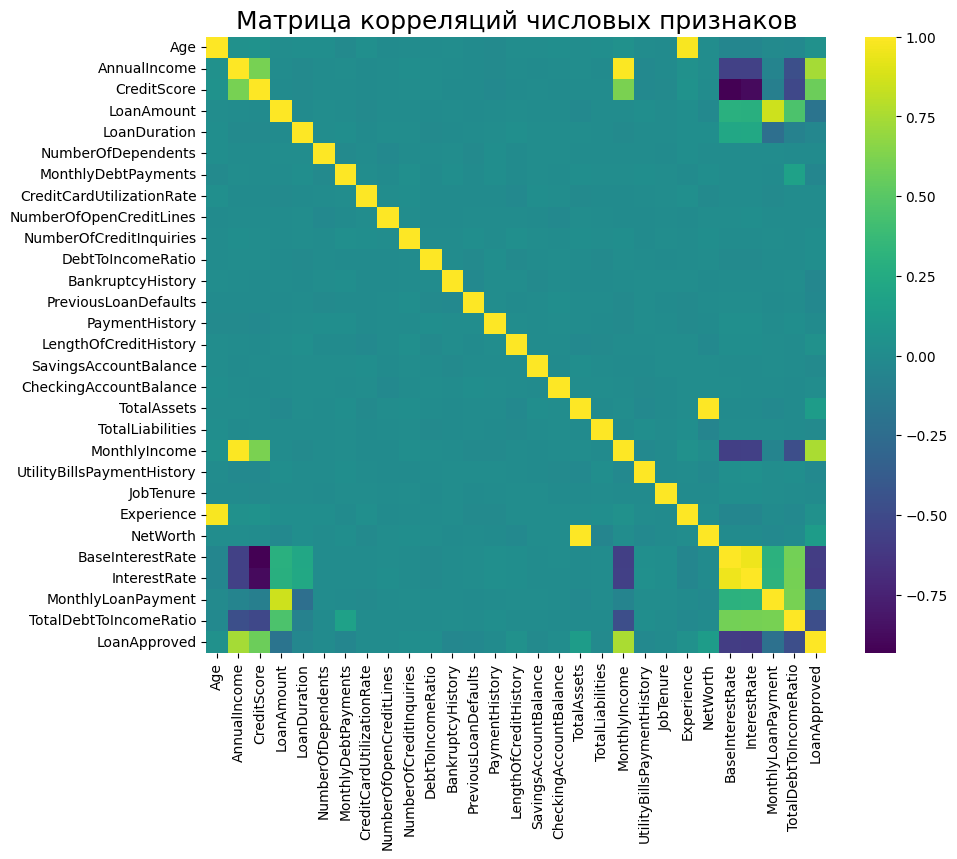

In [104]:
num_features = data_train.select_dtypes(include=np.number).columns.tolist()

correlation = pd.concat([data_train[num_features], y], axis=1)
corr_matrix = correlation.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=False, cmap='viridis')
plt.title('Матрица корреляций числовых признаков', fontsize=18)
plt.show()

Видно, что **MonthlyIncome** и **AnnualIncome** сильно коррелируют друг с другом, что может негативно сказаться на обучении модели. Давайте удалим **AnnualIncome** из обеих выборок.

In [105]:
data_train.drop(columns=['AnnualIncome'], inplace=True)
data_test.drop(columns=['AnnualIncome'], inplace=True)

In [106]:
num_features = data_train.select_dtypes(include=np.number).columns.tolist()
print("Числовых признаков после предобработки:", len(num_features))
print(num_features, "\n")

for x in num_features:
  print(data_train[x].describe(), "\n")

Числовых признаков после предобработки: 27
['Age', 'CreditScore', 'LoanAmount', 'LoanDuration', 'NumberOfDependents', 'MonthlyDebtPayments', 'CreditCardUtilizationRate', 'NumberOfOpenCreditLines', 'NumberOfCreditInquiries', 'DebtToIncomeRatio', 'BankruptcyHistory', 'PreviousLoanDefaults', 'PaymentHistory', 'LengthOfCreditHistory', 'SavingsAccountBalance', 'CheckingAccountBalance', 'TotalAssets', 'TotalLiabilities', 'MonthlyIncome', 'UtilityBillsPaymentHistory', 'JobTenure', 'Experience', 'NetWorth', 'BaseInterestRate', 'InterestRate', 'MonthlyLoanPayment', 'TotalDebtToIncomeRatio'] 

count    10487.000000
mean        39.850386
std         11.614132
min         18.000000
25%         32.000000
50%         40.000000
75%         48.000000
max         80.000000
Name: Age, dtype: float64 

count    10487.000000
mean       680.204682
std        171.218408
min        300.000000
25%        561.000000
50%        722.500000
75%        850.000000
max        850.000000
Name: CreditScore, dtype: flo

Как можно заметить, ни в одном из численных признаков нет заметных выбросов (по значениям), но давайте еще и графиков построим, чтобы посмотреть разброс значений от количества.

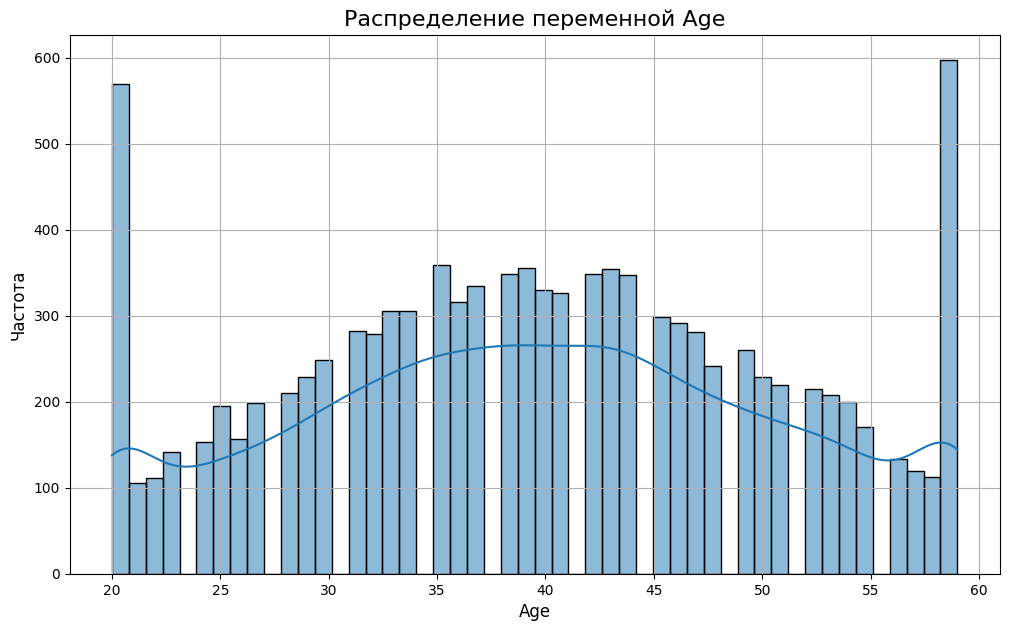

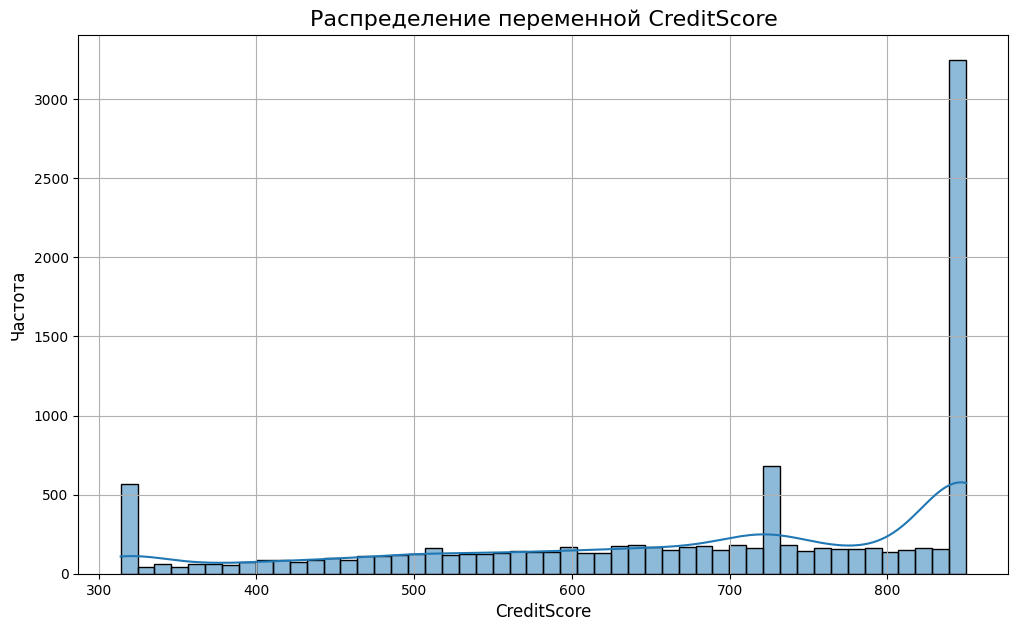

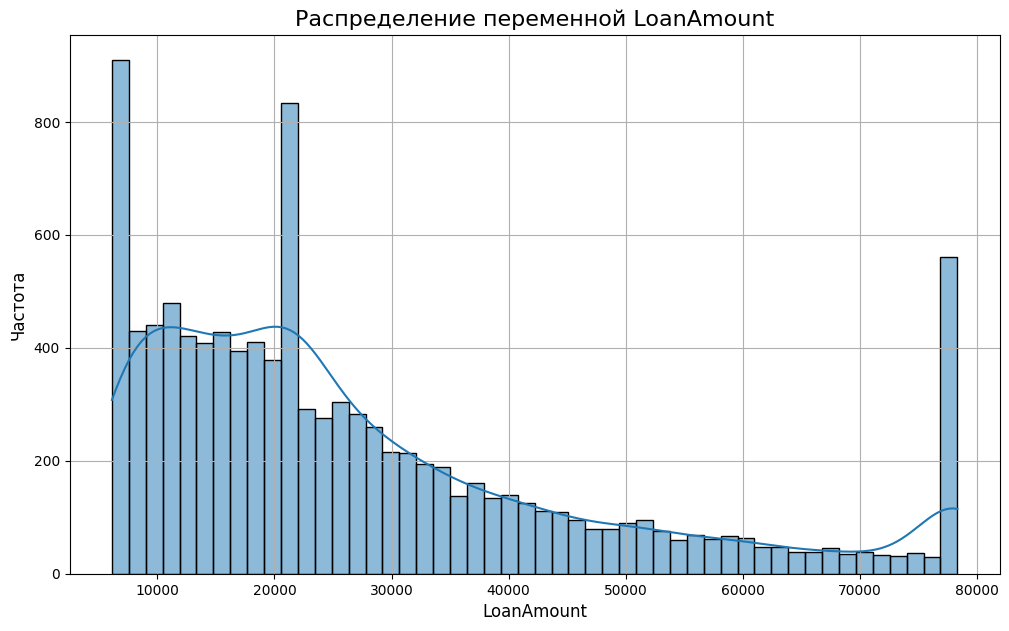

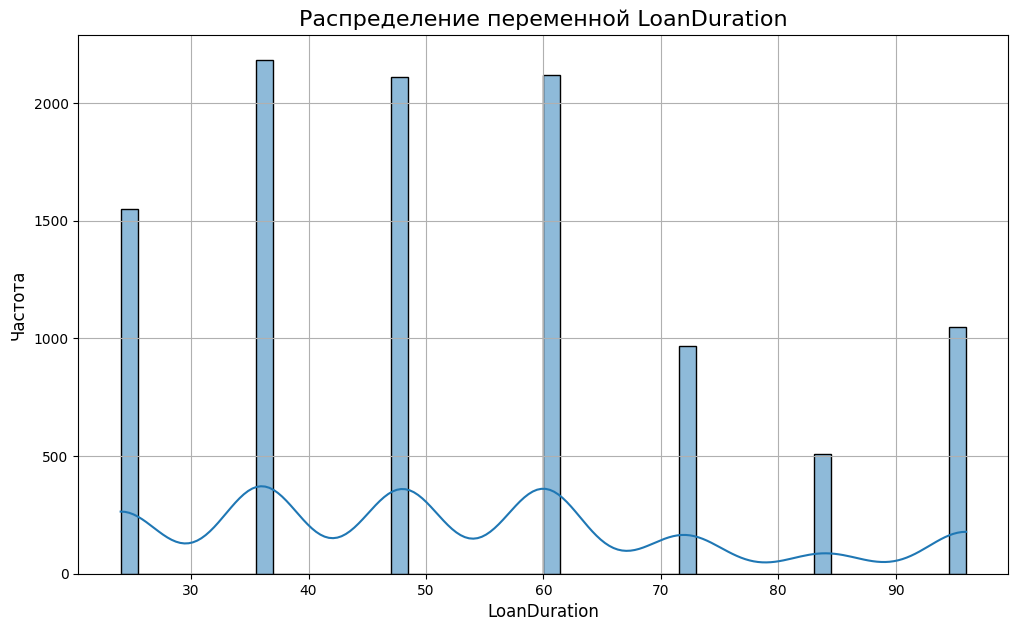

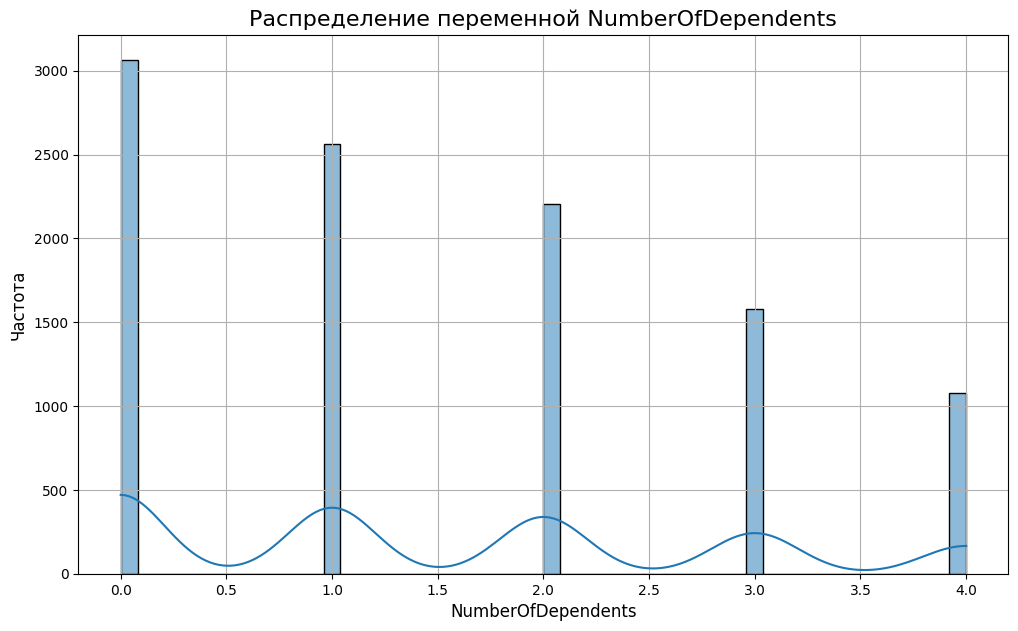

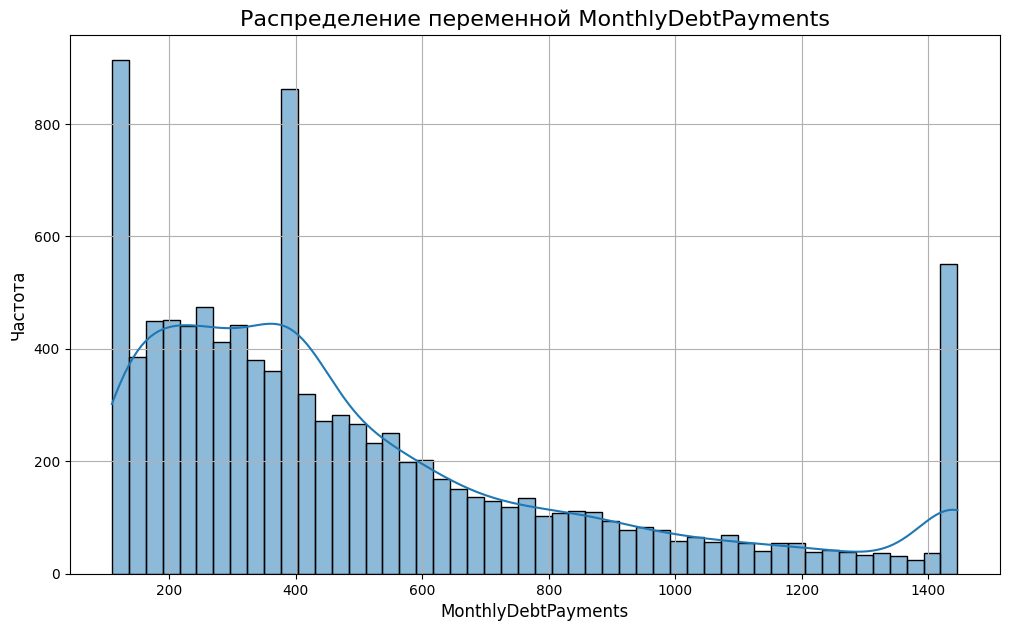

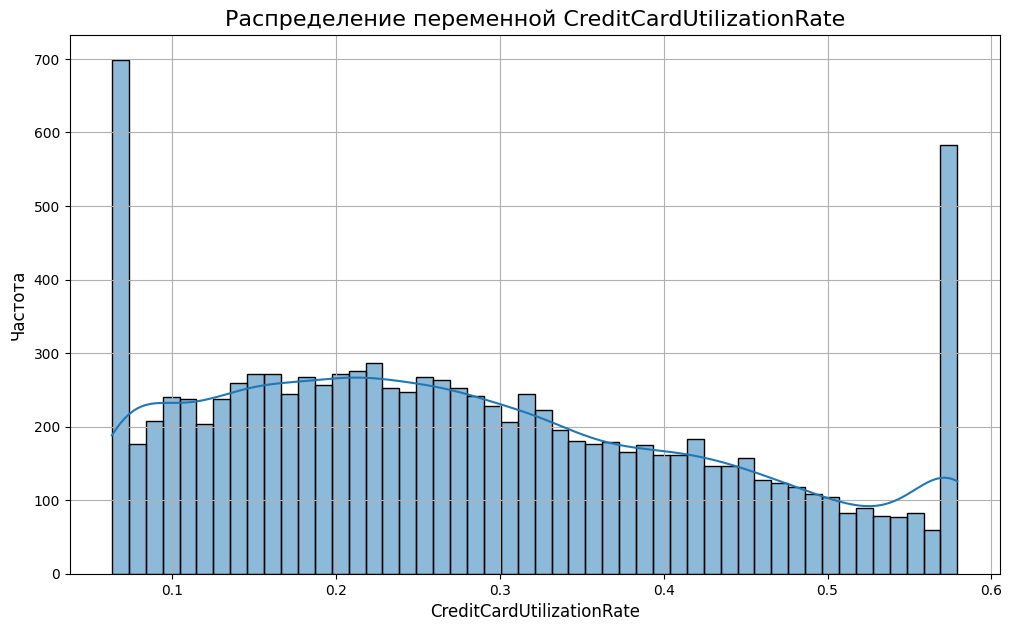

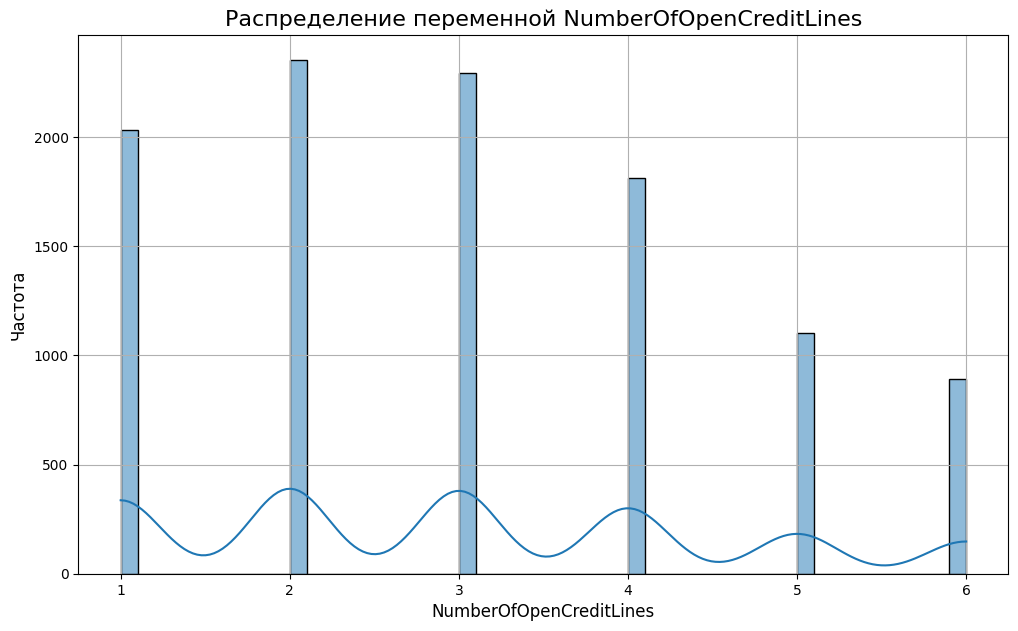

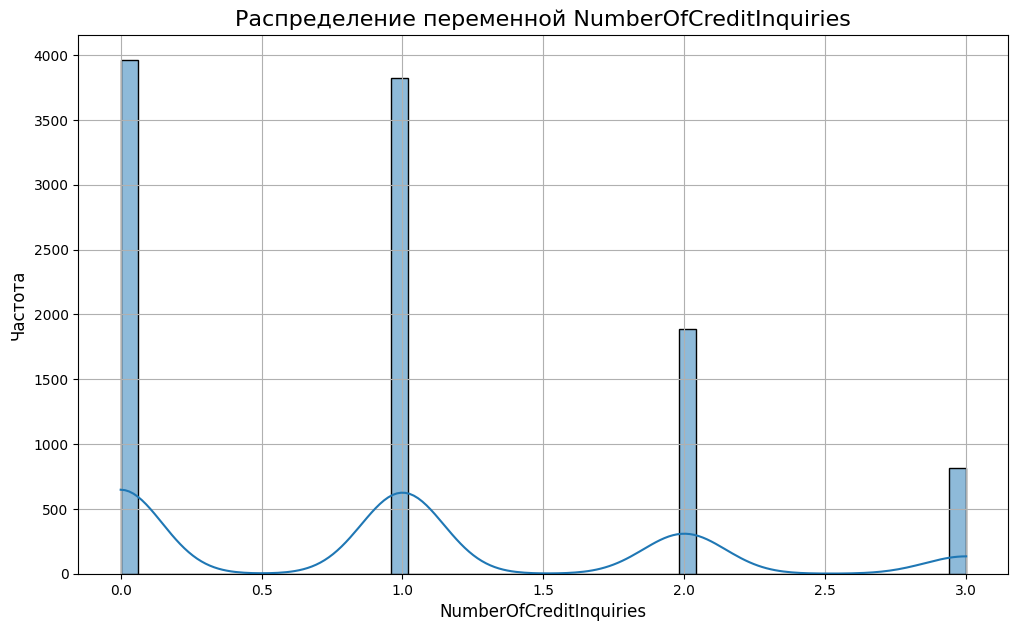

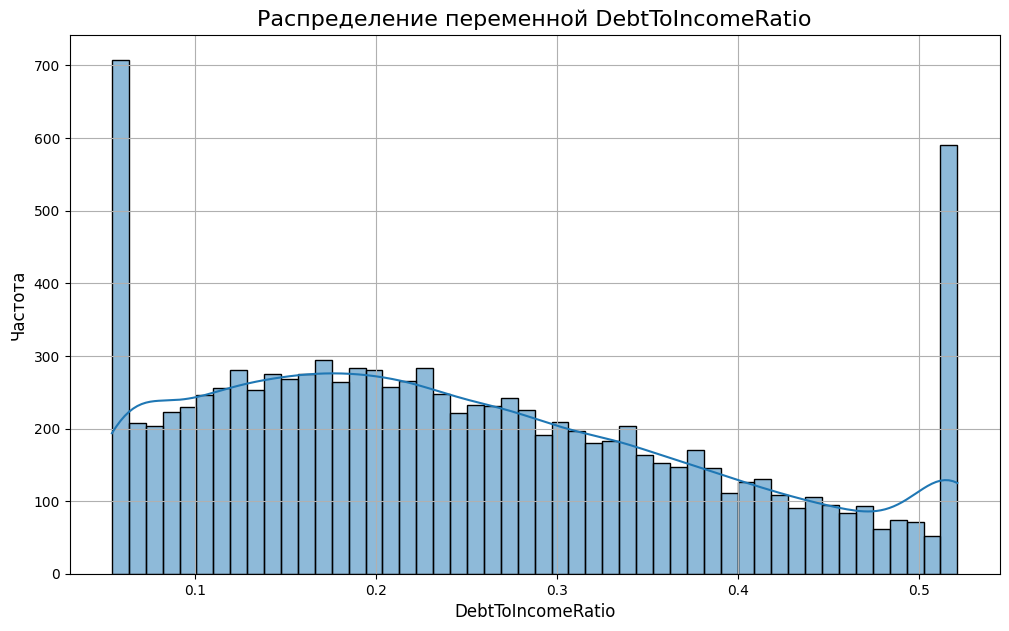

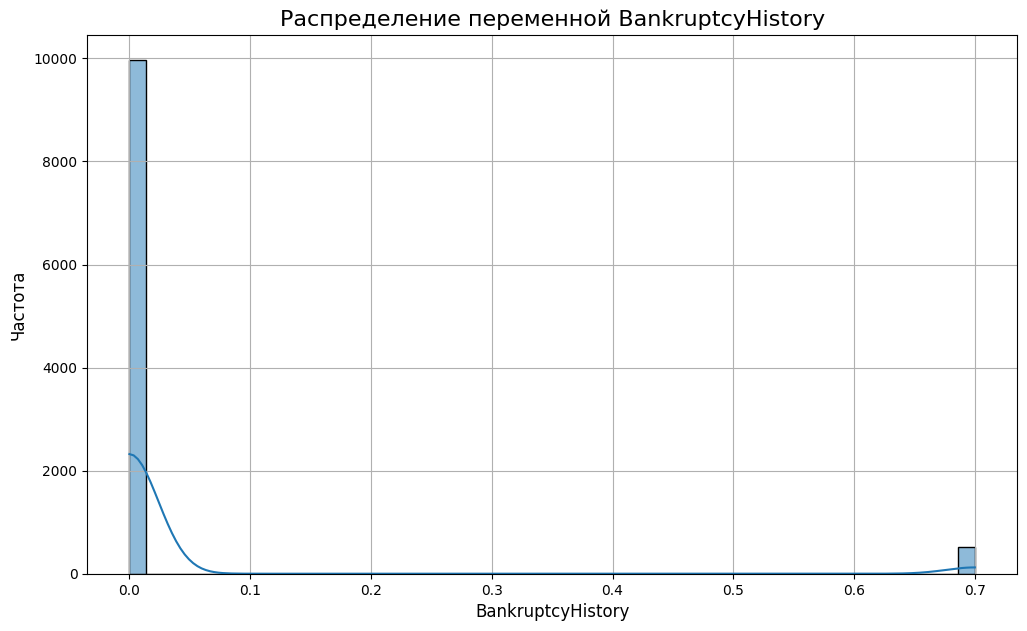

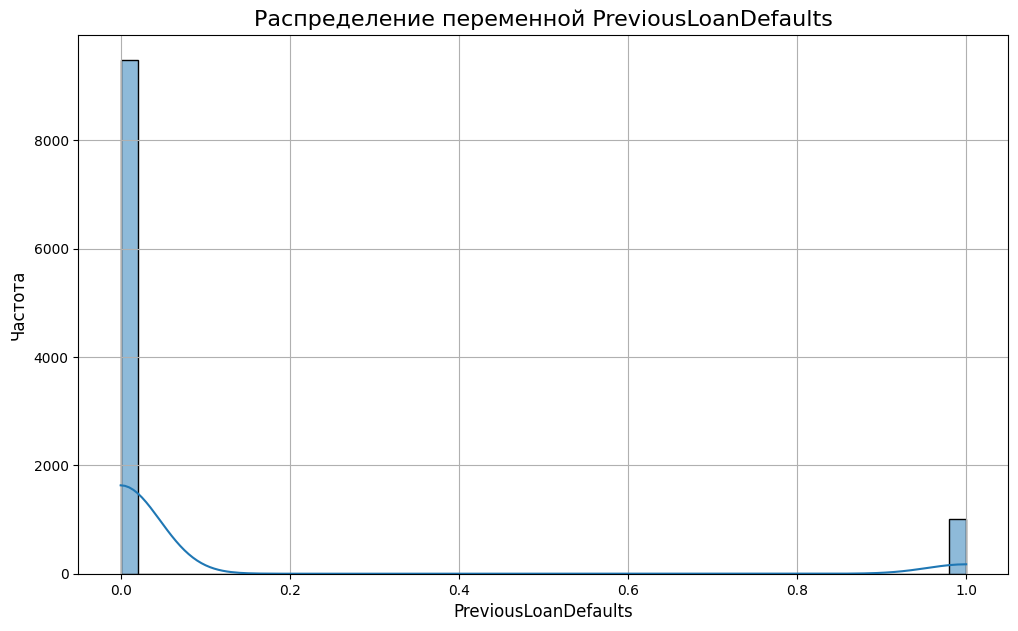

In [196]:
for x in num_features[:12]:
  plt.figure(figsize=(12, 7))
  sns.histplot(data_train[x], bins=50, kde=True)
  plt.title(f'Распределение переменной {x}', fontsize=16)
  plt.xlabel(f'{x}', fontsize=12)
  plt.ylabel('Частота', fontsize=12)
  plt.grid(True)
  plt.show()

По графикам можно легко понять, что у нас присутствуют признаки с "хвостами", с которыми нужно что-то делать. Попробуем привести их к нормальным с помощью обрезания этих самых "хвостов".



In [107]:
q_low = 0.05
q_high = 0.95

for col in num_features:
  low = data_train[col].quantile(q_low)
  high = data_train[col].quantile(q_high)
  data_train[col] = np.clip(data_train[col], low, high)
  data_test[col] = np.clip(data_test[col], low, high)

Теперь накинем ручных признаков, которые будут хорошо коллерировать с целевой переменной и позволят добиться лучшего результата на обучении модели.

1. Создадим признаки - отношения:

In [108]:
def create_iterations(df):
  epsilon = 1e-6
  if 'TotalLiabilities' in df.columns and 'TotalAssets' in df.columns:
      df['DebtToAssets_Ratio'] = df['TotalLiabilities'] / (df['TotalAssets'] + epsilon)
  if 'LoanAmount' in df.columns and 'MonthlyIncome' in df.columns:
      df['LoanToIncome_Ratio'] = df['LoanAmount'] / (df['MonthlyIncome'] + epsilon)
  if 'MonthlyLoanPayment' in df.columns and 'MonthlyIncome' in df.columns:
      df['PaymentToIncome_Ratio'] = df['MonthlyLoanPayment'] / (df['MonthlyIncome'] + epsilon)
  return df

data_train = create_iterations(data_train)
data_test = create_iterations(data_test)

2. Посмотрим на числовых признаках, какие значения каждый признак принимает больше всего, и создадим такие признаки.

In [109]:
for col in num_features:
  print(data_train[col].value_counts())

Age
59.0    597
20.0    569
35.0    359
39.0    355
43.0    354
42.0    349
38.0    348
44.0    347
37.0    335
40.0    330
41.0    327
36.0    316
34.0    305
33.0    305
45.0    299
46.0    292
31.0    282
47.0    281
32.0    279
49.0    260
30.0    248
48.0    241
50.0    229
29.0    229
51.0    220
52.0    215
28.0    210
53.0    208
54.0    200
27.0    199
25.0    195
55.0    171
26.0    157
24.0    153
23.0    142
56.0    133
57.0    119
58.0    112
22.0    111
21.0    106
Name: count, dtype: int64
CreditScore
850.0    3103
314.0     531
722.5     501
735.0      27
791.0      26
         ... 
319.0       2
316.0       2
327.0       2
373.0       1
325.0       1
Name: count, Length: 536, dtype: int64
LoanAmount
6127.9     525
78317.7    525
21828.5    501
26046.0      4
14806.0      4
          ... 
24123.0      1
74462.0      1
29383.0      1
52405.0      1
30450.0      1
Name: count, Length: 7764, dtype: int64
LoanDuration
36.0    2182
60.0    2121
48.0    2112
24.0    1551
96.0

Из количества значений в каждом признаке видно, что реально влияющими являются **MonthlyIncome** и **CreditScore**. Создадим соответствующие признаки

In [110]:
if 'MonthlyIncome' in data_train.columns:
  data_train['MonthlyIncome_Is1250'] = (data_train['MonthlyIncome'] == 1250).astype(int)
  data_train['MonthlyIncome_Is25000'] = (data_train['MonthlyIncome'] == 25000).astype(int)
  data_test['MonthlyIncome_Is1250'] = (data_test['MonthlyIncome'] == 1250).astype(int)
  data_test['MonthlyIncome_Is25000'] = (data_test['MonthlyIncome'] == 25000).astype(int)

if 'CreditScore' in data_train.columns:
  data_train['CreditScore_Is850'] = (data_train['CreditScore'] == 850).astype(int)
  data_train['CreditScore_Is313'] = (data_train['CreditScore'] == 313).astype(int)
  data_test['CreditScore_Is850'] = (data_test['CreditScore'] == 850).astype(int)
  data_test['CreditScore_Is313'] = (data_test['CreditScore'] == 313).astype(int)

Также создадим различные числовые вариации уже имеющихся категориальныъ признаков. Начнем с LabelEncoding подходящих под этот тип енкодинга признаков.

In [111]:
education_map = {'Doctorate': 0, 'Master': 1, 'Bachelor': 2, 'Associate': 3, 'High School': 4}
if 'EducationLevel' in data_train.columns:
    data_train["EducationLevel_num"] = data_train["EducationLevel"].map(education_map).fillna(2)
    data_test["EducationLevel_num"] = data_test["EducationLevel"].map(education_map).fillna(2)
    print("Создан EducationLevel_num")

employment_status_map = {"Employed": 0, "Self-Employed": 1, "Unemployed": 2}
if 'EmploymentStatus' in data_train.columns:
    data_train["EmploymentStatus_num"] = data_train["EmploymentStatus"].map(employment_status_map).fillna(1)
    data_test["EmploymentStatus_num"] = data_test["EmploymentStatus"].map(employment_status_map).fillna(1)
    print("Создан EmploymentStatus_num")

loan_purpose_map = {'Home': 0, 'Auto': 1, 'Education': 2, 'Debt Consolidation': 3, 'Other': 4}
if 'LoanPurpose' in data_train.columns:
    data_train['LoanPurpose_num'] = data_train['LoanPurpose'].map(loan_purpose_map).fillna(2)
    data_test['LoanPurpose_num'] = data_test['LoanPurpose'].map(loan_purpose_map).fillna(2)
    print("Создан LoanPurpose_num")

home_status_map = {"Own": 0, "Mortgage": 1, "Rent": 2, "Other": 3}
if 'HomeOwnershipStatus' in data_train.columns:
    data_train["HomeOwnershipStatus_num"] = data_train["HomeOwnershipStatus"].map(home_status_map).fillna(1.5)
    data_test["HomeOwnershipStatus_num"] = data_test["HomeOwnershipStatus"].map(home_status_map).fillna(1.5)
    print("Создан HomeOwnershipStatus_num")

Создан EducationLevel_num
Создан EmploymentStatus_num
Создан LoanPurpose_num
Создан HomeOwnershipStatus_num


Теперь создадим сложные признаки и взаимодействия между признаками

In [112]:
if 'CreditScore' in data_train.columns:
  if 'CreditScore_Sqrt' not in data_train.columns:
    data_train['CreditScore_sqrt2'] = np.sqrt(data_train['CreditScore'])
    data_test['CreditScore_sqrt2'] = np.sqrt(data_test['CreditScore'])
  if 'CreditScore_Cbrt' not in data_train.columns:
    data_train['CreditScore_sqrt3'] = np.cbrt(data_train['CreditScore'])
    data_test['CreditScore_sqrt3'] = np.cbrt(data_test['CreditScore'])

if 'TotalDebtToIncomeRatio' in data_train.columns:
  if 'TotalDebtToIncomeRatio_sqrt2' not in data_train.columns:
    data_train["TotalDebtToIncomeRatio_sqrt2"] = np.sqrt(data_train['TotalDebtToIncomeRatio'])
    data_test['TotalDebtToIncomeRatio_sqrt2'] = np.sqrt(data_test['TotalDebtToIncomeRatio'])
  if 'TotalDebtToIncomeRatio_sqrt3' not in data_train.columns:
    data_train["TotalDebtToIncomeRatio_sqrt3"] = np.cbrt(data_train['TotalDebtToIncomeRatio'])
    data_test['TotalDebtToIncomeRatio_sqrt3'] = np.cbrt(data_test['TotalDebtToIncomeRatio'])

if 'CreditScore' in data_train.columns and 'TotalDebtToIncomeRatio' in data_train.columns:
  if 'CreditScore_TotalDebtToIncomeRatio' not in data_train.columns:
    data_train["CreditScore_TotalDebtToIncomeRatio"] = data_train["CreditScore"] * data_train["TotalDebtToIncomeRatio"]
    data_test["CreditScore_TotalDebtToIncomeRatio"] = data_test["CreditScore"] * data_test["TotalDebtToIncomeRatio"]

if 'MonthlyIncome' in data_train.columns and 'LoanAmount' in data_train.columns:
  if 'Income_LoanAmount_Interaction' not in data_train.columns:
    data_train["Income_LoanAmount_Interaction"] = data_train["MonthlyIncome"] * data_train["LoanAmount"]
    data_test["Income_LoanAmount_Interaction"] = data_test["MonthlyIncome"] * data_test["LoanAmount"]

if 'TotalDebtToIncomeRatio' in data_train.columns and 'InterestRate' in data_train.columns:
  if 'Debt_Interest_Interaction' not in data_train.columns:
    data_train["Debt_Interest_Interaction"] = data_train["TotalDebtToIncomeRatio"] * data_train["InterestRate"]
    data_test["Debt_Interest_Interaction"] = data_test["TotalDebtToIncomeRatio"] * data_test["InterestRate"]

if 'CreditScore' in data_train.columns and 'TotalDebtToIncomeRatio' in data_train.columns:
  if 'CreditScore_DTI' not in data_train.columns:
    data_train['CreditScore_DTI'] = data_train['CreditScore'] / (data_train['TotalDebtToIncomeRatio'] + 1)
    data_test['CreditScore_DTI'] = data_test['CreditScore'] / (data_test['TotalDebtToIncomeRatio'] + 1)

if 'BaseInterestRate' in data_train.columns and 'MonthlyIncome' in data_train.columns:
  if 'BaseInterestRate_MonthlyIncome' not in data_train.columns:
    data_train["BaseInterestRate_MonthlyIncome"] = data_train['MonthlyIncome'] * data_train["BaseInterestRate"]
    data_test["BaseInterestRate_MonthlyIncome"] = data_test['MonthlyIncome'] * data_test["BaseInterestRate"]

Также создадим и логарифмические преобразования:

In [113]:
features_to_log = ["MonthlyLoanPayment", "LoanAmount", "NetWorth", "TotalAssets",
                   "CreditScore", "TotalDebtToIncomeRatio", "CreditScore_TotalDebtToIncomeRatio"]

for feature in features_to_log:
    if feature in data_train.columns and f'Log_{feature}' not in data_train.columns:
        data_train[f'Log_{feature}'] = np.log1p(data_train[feature])
        data_test[f'Log_{feature}'] = np.log1p(data_test[feature])

In [114]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10487 entries, 0 to 11016
Data columns (total 59 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Age                                     10487 non-null  float64
 1   CreditScore                             10487 non-null  float64
 2   LoanAmount                              10487 non-null  float64
 3   LoanDuration                            10487 non-null  float64
 4   MaritalStatus                           10487 non-null  object 
 5   NumberOfDependents                      10487 non-null  float64
 6   HomeOwnershipStatus                     10487 non-null  object 
 7   MonthlyDebtPayments                     10487 non-null  float64
 8   CreditCardUtilizationRate               10487 non-null  float64
 9   NumberOfOpenCreditLines                 10487 non-null  float64
 10  NumberOfCreditInquiries                 10487 non-null  float64

In [115]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 59 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Age                                     5000 non-null   int64  
 1   CreditScore                             5000 non-null   int64  
 2   LoanAmount                              5000 non-null   float64
 3   LoanDuration                            5000 non-null   int64  
 4   MaritalStatus                           5000 non-null   object 
 5   NumberOfDependents                      5000 non-null   int64  
 6   HomeOwnershipStatus                     5000 non-null   object 
 7   MonthlyDebtPayments                     5000 non-null   float64
 8   CreditCardUtilizationRate               5000 non-null   float64
 9   NumberOfOpenCreditLines                 5000 non-null   int64  
 10  NumberOfCreditInquiries                 5000 non-null   int6

Добавим биннинг

In [116]:
numeric_for_binning = [col for col in data_train.select_dtypes(include=np.number).columns
                       if not (col.startswith(('MonthlyIncome_Is', 'CreditScore_Is', 'Log_')) or
                               col.endswith(('_sqrt3', '_sqrt2')) or 'Interaction' in col or '_Ratio' in col)]

features_to_bin = ['Age', 'CreditScore', 'LengthOfCreditHistory', 'LoanAmount', 'MonthlyIncome']

features_to_bin = [col for col in features_to_bin if col in data_train.columns and col in numeric_for_binning]

Q_BINS = 8
for col in features_to_bin:
    if col in data_train.columns:
        data_train[f'{col}_bin'] = pd.qcut(data_train[col], q=Q_BINS, labels=False, duplicates='drop').astype('category')
        data_test[f'{col}_bin'] = pd.qcut(data_test[col], q=Q_BINS, labels=False, duplicates='drop').astype('category')
print(f"Признаки {features_to_bin} были дискретизированы и добавлены.")


Признаки ['Age', 'CreditScore', 'LengthOfCreditHistory', 'LoanAmount', 'MonthlyIncome'] были дискретизированы и добавлены.


In [117]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10487 entries, 0 to 11016
Data columns (total 64 columns):
 #   Column                                  Non-Null Count  Dtype   
---  ------                                  --------------  -----   
 0   Age                                     10487 non-null  float64 
 1   CreditScore                             10487 non-null  float64 
 2   LoanAmount                              10487 non-null  float64 
 3   LoanDuration                            10487 non-null  float64 
 4   MaritalStatus                           10487 non-null  object  
 5   NumberOfDependents                      10487 non-null  float64 
 6   HomeOwnershipStatus                     10487 non-null  object  
 7   MonthlyDebtPayments                     10487 non-null  float64 
 8   CreditCardUtilizationRate               10487 non-null  float64 
 9   NumberOfOpenCreditLines                 10487 non-null  float64 
 10  NumberOfCreditInquiries                 10487 non-n

Сюда же добавим также и полиномиальные фичи, без них никуда

In [118]:
from sklearn.preprocessing import PolynomialFeatures

exclude_patterns = ['_bin', '_Is', '_sqrt2', '_sqrt3', '_log', 'Interaction', '_Ratio', '_num']

original_numeric_features = [col for col in data_train.select_dtypes(include=np.number).columns.tolist()
                             if not any(pattern in col for pattern in exclude_patterns)]

poly = PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)

poly_features_train = poly.fit_transform(data_train[original_numeric_features])
poly_df_train = pd.DataFrame(
    poly_features_train,
    columns=poly.get_feature_names_out(original_numeric_features),
    index=data_train.index
)

poly_features_test = poly.transform(data_test[original_numeric_features])
poly_df_test = pd.DataFrame(
    poly_features_test,
    columns=poly.get_feature_names_out(original_numeric_features),
    index=data_test.index
)

categorical_features = data_train.select_dtypes(exclude=np.number).columns.tolist()

new_numeric_features = [col for col in data_train.select_dtypes(include=np.number).columns
                        if col not in original_numeric_features and col not in categorical_features]

print(f"Оригинальных числовых признаков: {len(original_numeric_features)}")
print(f"Новых числовых признаков: {len(new_numeric_features)}")
print(f"Категориальных признаков: {len(categorical_features)}")

# Правильное объединение:
# - полиномиальные признаки (только от оригинальных числовых)
# - все категориальные (включая _bin)
# - новые числовые признаки (созданные вручную)
data_train = pd.concat([
    data_train[categorical_features],
    poly_df_train,
    data_train[new_numeric_features]
], axis=1)

data_test = pd.concat([
    data_test[categorical_features],
    poly_df_test,
    data_test[new_numeric_features]
], axis=1)

print(f"Полиномиальные признаки созданы. Новая размерность X: {data_train.shape}")
print(f"Полиномиальные признаки созданы. Новая размерность X: {data_test.shape}")

Оригинальных числовых признаков: 37
Новых числовых признаков: 17
Категориальных признаков: 10
Полиномиальные признаки созданы. Новая размерность X: (10487, 730)
Полиномиальные признаки созданы. Новая размерность X: (5000, 730)


In [119]:
numeric_features_final = data_train.select_dtypes(include=[np.number]).columns.tolist()
numeric_features_final1 = data_test.select_dtypes(include=[np.number]).columns.tolist()
print("Числовых признаков после предобработки:", len(numeric_features_final))
print(numeric_features_final)  # первые 30 для проверки

print("Числовых признаков после предобработки:", len(numeric_features_final1))
print(numeric_features_final1)  # первые 30 для проверки


Числовых признаков после предобработки: 720
['Age', 'CreditScore', 'LoanAmount', 'LoanDuration', 'NumberOfDependents', 'MonthlyDebtPayments', 'CreditCardUtilizationRate', 'NumberOfOpenCreditLines', 'NumberOfCreditInquiries', 'DebtToIncomeRatio', 'BankruptcyHistory', 'PreviousLoanDefaults', 'PaymentHistory', 'LengthOfCreditHistory', 'SavingsAccountBalance', 'CheckingAccountBalance', 'TotalAssets', 'TotalLiabilities', 'MonthlyIncome', 'UtilityBillsPaymentHistory', 'JobTenure', 'Experience', 'NetWorth', 'BaseInterestRate', 'InterestRate', 'MonthlyLoanPayment', 'TotalDebtToIncomeRatio', 'CreditScore_TotalDebtToIncomeRatio', 'CreditScore_DTI', 'BaseInterestRate_MonthlyIncome', 'Log_MonthlyLoanPayment', 'Log_LoanAmount', 'Log_NetWorth', 'Log_TotalAssets', 'Log_CreditScore', 'Log_TotalDebtToIncomeRatio', 'Log_CreditScore_TotalDebtToIncomeRatio', 'Age CreditScore', 'Age LoanAmount', 'Age LoanDuration', 'Age NumberOfDependents', 'Age MonthlyDebtPayments', 'Age CreditCardUtilizationRate', 'Age N

In [120]:
all_categorical_features = data_train.select_dtypes(exclude=np.number).columns.tolist()

for col in all_categorical_features:
    data_train[col] = data_train[col].astype('category')
    data_test[col] = data_test[col].astype('category')

for col in all_categorical_features:
    value_counts = data_train[col].value_counts(normalize=True)
    rare_cats = value_counts[value_counts < 0.01].index.tolist()

    if rare_cats:
        # Убедимся, что 'Other' есть в категориях, перед тем как его использовать
        if 'Other' not in data_train[col].cat.categories:
            data_train[col] = data_train[col].cat.add_categories('Other')
            data_test[col] = data_test[col].cat.add_categories('Other')

        data_train[col] = data_train[col].replace(rare_cats, 'Other')
        data_test[col] = data_test[col].replace(rare_cats, 'Other')

data_train = pd.get_dummies(data_train, columns=categorical_features, drop_first=True)
data_test = pd.get_dummies(data_test, columns=categorical_features, drop_first=True)

train_cols = data_train.columns
test_cols = data_test.columns
missing_in_test = set(train_cols) - set(test_cols)
for c in missing_in_test:
    data_test[c] = 0
data_test = data_test[train_cols]

print(f"Итоговая размерность X для обучения: {data_train.shape}")

Итоговая размерность X для обучения: (10487, 767)


**ВТОРОЙ ПУНКТ С НОРМАЛИЗАЦИЕЙ**

In [122]:
class DataNormalizer:
    def __init__(self, method='zscore'):
        self.method = method
        self.params = {}

    def fit(self, X):
        X_np = X.to_numpy() if isinstance(X, pd.DataFrame) else X
        if self.method == 'zscore':
            self.params['mean'] = np.mean(X_np, axis=0)
            self.params['std'] = np.std(X_np, axis=0)
        elif self.method == 'minmax':
            self.params['min'] = np.min(X_np, axis=0)
            self.params['max'] = np.max(X_np, axis=0)
        return self

    def transform(self, X):
        X_np = X.to_numpy() if isinstance(X, pd.DataFrame) else X
        if self.method == 'zscore':
            std = self.params['std'].copy()
            std[std == 0] = 1e-9
            return (X_np - self.params['mean']) / std
        elif self.method == 'minmax':
            range_val = self.params['max'] - self.params['min']
            range_val[range_val == 0] = 1e-9
            return (X_np - self.params['min']) / range_val

    def fit_transform(self, X):
        return self.fit(X).transform(X)

# Преобразуем все столбцы в числовой формат, принудительно заменяя ошибки на NaN
data_train_numeric = data_train.apply(pd.to_numeric, errors='coerce')
data_test_numeric = data_test.apply(pd.to_numeric, errors='coerce')

# Заполняем любые NaN значения, появившиеся после приведения типов, средним значением столбца.
# Если столбец полностью состоит из NaN, заполняем нулями.
# Явно преобразуем в float, чтобы избежать проблем с object dtypes, если fillna не сменил тип.
data_train = data_train_numeric.fillna(data_train_numeric.mean(numeric_only=True)).fillna(0).astype(float)
data_test = data_test_numeric.fillna(data_test_numeric.mean(numeric_only=True)).fillna(0).astype(float)

# Apply Z-score normalization
zscore_normalizer = DataNormalizer(method='zscore')
data_train_z_scale = pd.DataFrame(zscore_normalizer.fit_transform(data_train), columns=data_train.columns, index=data_train.index)
data_test_z_scale = pd.DataFrame(zscore_normalizer.transform(data_test), columns=data_test.columns, index=data_test.index)

# Apply Min-Max normalization
minmax_normalizer = DataNormalizer(method='minmax')
data_train_min_max_scale = pd.DataFrame(minmax_normalizer.fit_transform(data_train), columns=data_train.columns, index=data_train.index)
data_test_min_max_scale = pd.DataFrame(minmax_normalizer.transform(data_test), columns=data_test.columns, index=data_test.index)

print("\nПроверка на наличие NaN после очистки и скейлинга:")
print(f"Количество NaN в data_train_z_scale: {data_train_z_scale.isnull().sum().sum()}")
print(f"Количество NaN в data_test_z_scale: {data_test_z_scale.isnull().sum().sum()}")
print(f"Количество NaN в data_train_min_max_scale: {data_train_min_max_scale.isnull().sum().sum()}")
print(f"Количество NaN в data_test_min_max_scale: {data_test_min_max_scale.isnull().sum().sum()}")


Проверка на наличие NaN после очистки и скейлинга:
Количество NaN в data_train_z_scale: 0
Количество NaN в data_test_z_scale: 0
Количество NaN в data_train_min_max_scale: 0
Количество NaN в data_test_min_max_scale: 0


In [123]:
print("Первые 5 строк данных после Z-score нормализации:")
print(data_train_z_scale.head())

print("\nПервые 5 строк данных после Z-score нормализации:")
print(data_test_z_scale.head())

Первые 5 строк данных после Z-score нормализации:
        Age  CreditScore  LoanAmount  LoanDuration  NumberOfDependents  \
0 -1.160306    -0.776883   -0.533717      0.319019           -0.398758   
1  1.404800     0.996352   -0.593733     -0.795236           -0.398758   
2  1.038356     0.996352    0.541777     -0.795236           -1.154410   
3 -1.343528     0.978678   -0.437286     -0.238109           -1.154410   
4  1.404800     0.996352    0.134945     -0.238109            0.356894   

   MonthlyDebtPayments  CreditCardUtilizationRate  NumberOfOpenCreditLines  \
0             1.614512                  -0.870891                -0.668175   
1            -0.820836                  -0.711915                -0.017013   
2             0.102061                   1.091349                -0.017013   
3            -0.980622                  -0.626356                 1.936471   
4             0.146140                  -0.056503                -0.017013   

   NumberOfCreditInquiries  DebtToIn

In [124]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [125]:
X = data_train_z_scale.copy()
y_numeric = y.astype(float)

In [189]:
X_train, X_val, y_train, y_val = train_test_split(X, y_numeric, test_size=0.2, random_state=42)
print("Данные успешно разделены:")
print(f"Размер обучающей выборки (X_train): {X_train.shape}")
print(f"Размер валидационной выборки (X_val): {X_val.shape}")
print(f"Размер обучающих меток (y_train): {y_train.shape}")
print(f"Размер валидационных меток (y_val): {y_val.shape}")

y_train_np = y_train.to_numpy()
y_val_np = y_val.to_numpy()

Данные успешно разделены:
Размер обучающей выборки (X_train): (8389, 767)
Размер валидационной выборки (X_val): (2098, 767)
Размер обучающих меток (y_train): (8389,)
Размер валидационных меток (y_val): (2098,)


Реализуем Бэггинг

In [190]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.base import clone
from collections import Counter

class MyBaggingClassifier:
    def __init__(self, base_estimator=None, n_estimators=10, max_samples=1.0,
                 max_features=1.0, bootstrap=True, random_state=None):
        self.base_estimator = base_estimator
        self.n_estimators = n_estimators
        self.max_samples = max_samples
        self.max_features = max_features
        self.bootstrap = bootstrap
        self.random_state = random_state
        self.estimators_ = []
        self.feature_indices_ = []

    def fit(self, X, y):
        np.random.seed(self.random_state)

        X = np.array(X)
        y = np.array(y)

        n_samples, n_features = X.shape

        if isinstance(self.max_samples, float):
            n_samples_bootstrap = int(self.max_samples * n_samples)
        else:
            n_samples_bootstrap = self.max_samples

        if isinstance(self.max_features, float):
            n_features_bootstrap = int(self.max_features * n_features)
        else:
            n_features_bootstrap = self.max_features

        if self.base_estimator is None:
            base_est = DecisionTreeClassifier(random_state=self.random_state)
        else:
            base_est = self.base_estimator

        self.estimators_ = []
        self.feature_indices_ = []

        for i in range(self.n_estimators):
            estimator = clone(base_est)

            if self.bootstrap:
                indices = np.random.choice(n_samples, size=n_samples_bootstrap, replace=True)
            else:
                indices = np.random.choice(n_samples, size=n_samples_bootstrap, replace=False)

            feature_indices = np.random.choice(n_features, size=n_features_bootstrap, replace=False)

            X_bootstrap = X[indices][:, feature_indices]
            y_bootstrap = y[indices]

            estimator.fit(X_bootstrap, y_bootstrap)

            self.estimators_.append(estimator)
            self.feature_indices_.append(feature_indices)

        return self

    def predict(self, X):
        X = np.array(X)

        predictions = []

        for estimator, feature_indices in zip(self.estimators_, self.feature_indices_):
            X_subset = X[:, feature_indices]
            pred = estimator.predict(X_subset)
            predictions.append(pred)

        predictions = np.array(predictions).T

        y_pred = []
        for preds in predictions:
            counter = Counter(preds)
            most_common = counter.most_common(1)[0][0]
            y_pred.append(most_common)

        return np.array(y_pred)

    def predict_proba(self, X):
        X = np.array(X)

        all_probas = []

        for estimator, feature_indices in zip(self.estimators_, self.feature_indices_):
            X_subset = X[:, feature_indices]

            if hasattr(estimator, 'predict_proba'):
                proba = estimator.predict_proba(X_subset)
            else:
                pred = estimator.predict(X_subset)
                proba = np.zeros((len(pred), len(np.unique(pred))))
                for idx, p in enumerate(pred):
                    proba[idx, int(p)] = 1.0

            all_probas.append(proba)

        mean_proba = np.mean(all_probas, axis=0)

        return mean_proba


In [191]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
import time

print("\n1. МОЯ РЕАЛИЗАЦИЯ BAGGING")

start_time = time.time()

my_bagging = MyBaggingClassifier(
    base_estimator=DecisionTreeClassifier(max_depth=10, random_state=42),
    n_estimators=50,
    max_samples=0.8,
    max_features=0.8,
    bootstrap=True,
    random_state=42
)

my_bagging.fit(X_train, y_train)
train_time_my = time.time() - start_time

y_pred_my = my_bagging.predict(X_val)
y_proba_my = my_bagging.predict_proba(X_val)

acc_my = accuracy_score(y_val, y_pred_my)
roc_auc_my = roc_auc_score(y_val, y_proba_my[:, 1])

print(f"Время обучения: {train_time_my:.2f} сек")
print(f"Accuracy: {acc_my:.4f}")
print(f"ROC-AUC: {roc_auc_my:.4f}")
print("\nClassification Report:")
print(classification_report(y_val, y_pred_my))


print("\n2. SKLEARN BAGGING")
print("-"*50)

start_time = time.time()

sklearn_bagging = BaggingClassifier(
    estimator=DecisionTreeClassifier(max_depth=10, random_state=42),
    n_estimators=50,
    max_samples=0.8,
    max_features=0.8,
    bootstrap=True,
    random_state=42
)

sklearn_bagging.fit(X_train, y_train)
train_time_sklearn = time.time() - start_time

y_pred_sklearn = sklearn_bagging.predict(X_val)
y_proba_sklearn = sklearn_bagging.predict_proba(X_val)

acc_sklearn = accuracy_score(y_val, y_pred_sklearn)
roc_auc_sklearn = roc_auc_score(y_val, y_proba_sklearn[:, 1])

print(f"Время обучения: {train_time_sklearn:.2f} сек")
print(f"Accuracy: {acc_sklearn:.4f}")
print(f"ROC-AUC: {roc_auc_sklearn:.4f}")
print("\nClassification Report:")
print(classification_report(y_val, y_pred_sklearn))


print("\n3. СРАВНЕНИЕ РЕЗУЛЬТАТОВ")
print("="*50)
print(f"{'Метрика':<20} {'Моя реализация':<20} {'Sklearn':<20} {'Разница':<20}")
print("-"*80)
print(f"{'Accuracy':<20} {acc_my:<20.4f} {acc_sklearn:<20.4f} {abs(acc_my - acc_sklearn):<20.6f}")
print(f"{'ROC-AUC':<20} {roc_auc_my:<20.4f} {roc_auc_sklearn:<20.4f} {abs(roc_auc_my - roc_auc_sklearn):<20.6f}")
print(f"{'Время обучения':<20} {train_time_my:<20.2f} {train_time_sklearn:<20.2f} {abs(train_time_my - train_time_sklearn):<20.2f}")
print("="*50)

if abs(acc_my - acc_sklearn) < 0.01 and abs(roc_auc_my - roc_auc_sklearn) < 0.01:
    print("Реализация работает корректно")
else:
    print("Есть расхождения в результатах")



1. МОЯ РЕАЛИЗАЦИЯ BAGGING
Время обучения: 247.65 сек
Accuracy: 0.9218
ROC-AUC: 0.9774

Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.91      0.92      1034
         1.0       0.91      0.93      0.92      1064

    accuracy                           0.92      2098
   macro avg       0.92      0.92      0.92      2098
weighted avg       0.92      0.92      0.92      2098


2. SKLEARN BAGGING
--------------------------------------------------
Время обучения: 206.75 сек
Accuracy: 0.9209
ROC-AUC: 0.9767

Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.91      0.92      1034
         1.0       0.91      0.93      0.92      1064

    accuracy                           0.92      2098
   macro avg       0.92      0.92      0.92      2098
weighted avg       0.92      0.92      0.92      2098


3. СРАВНЕНИЕ РЕЗУЛЬТАТОВ
Метрика              Моя реализация       Sklearn     

Реализация грпадиентного бустинга

In [192]:
from sklearn.tree import DecisionTreeRegressor
from scipy.special import expit

class MyGradientBoostingClassifier:
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3,
                 min_samples_split=2, min_samples_leaf=1, subsample=1.0,
                 random_state=None):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.subsample = subsample
        self.random_state = random_state
        self.trees_ = []
        self.init_prediction_ = None

    def _sigmoid(self, x):
        return expit(x)

    def _log_loss_gradient(self, y_true, y_pred_proba):
        return y_true - y_pred_proba

    def fit(self, X, y):
        np.random.seed(self.random_state)

        X = np.array(X)
        y = np.array(y)
        n_samples = X.shape[0]

        pos_rate = np.mean(y)
        pos_rate = np.clip(pos_rate, 1e-15, 1 - 1e-15)
        self.init_prediction_ = np.log(pos_rate / (1 - pos_rate))

        F = np.full(n_samples, self.init_prediction_)

        for i in range(self.n_estimators):
            y_pred_proba = self._sigmoid(F)

            gradients = self._log_loss_gradient(y, y_pred_proba)

            if self.subsample < 1.0:
                sample_size = int(self.subsample * n_samples)
                indices = np.random.choice(n_samples, size=sample_size, replace=False)
                X_subset = X[indices]
                gradients_subset = gradients[indices]
            else:
                X_subset = X
                gradients_subset = gradients

            tree = DecisionTreeRegressor(
                max_depth=self.max_depth,
                min_samples_split=self.min_samples_split,
                min_samples_leaf=self.min_samples_leaf,
                random_state=self.random_state + i if self.random_state else None
            )

            tree.fit(X_subset, gradients_subset)

            update = tree.predict(X)

            F += self.learning_rate * update

            self.trees_.append(tree)

        return self

    def _predict_raw(self, X):
        X = np.array(X)

        F = np.full(X.shape[0], self.init_prediction_)

        for tree in self.trees_:
            F += self.learning_rate * tree.predict(X)
        return F

    def predict_proba(self, X):
        F = self._predict_raw(X)

        proba_class_1 = self._sigmoid(F)
        proba_class_0 = 1 - proba_class_1

        return np.column_stack([proba_class_0, proba_class_1])

    def predict(self, X):
        proba = self.predict_proba(X)
        return (proba[:, 1] >= 0.5).astype(int)

In [194]:
from sklearn.ensemble import GradientBoostingClassifier

params = {
    'n_estimators': 100,
    'learning_rate': 0.1,
    'max_depth': 3,
    'subsample': 0.8,
    'random_state': 42
}

print("1. MY GRADIENT BOOSTING")

my_gb = MyGradientBoostingClassifier(
    n_estimators=params['n_estimators'],
    learning_rate=params['learning_rate'],
    max_depth=params['max_depth'],
    subsample=params['subsample'],
    random_state=params['random_state']
)

my_gb.fit(X_train, y_train)

y_pred_my = my_gb.predict(X_val)
y_proba_my = my_gb.predict_proba(X_val)

acc_my = accuracy_score(y_val, y_pred_my)
roc_auc_my = roc_auc_score(y_val, y_proba_my[:, 1])

print(f"Accuracy: {acc_my:.4f}")
print(f"ROC-AUC: {roc_auc_my:.4f}")
print("Classification Report:")
print(classification_report(y_val, y_pred_my))

print("2. SKLEARN GRADIENT BOOSTING")

sklearn_gb = GradientBoostingClassifier(
    n_estimators=params['n_estimators'],
    learning_rate=params['learning_rate'],
    max_depth=params['max_depth'],
    subsample=params['subsample'],
    random_state=params['random_state']
)
sklearn_gb.fit(X_train, y_train)


y_pred_sklearn = sklearn_gb.predict(X_val)
y_proba_sklearn = sklearn_gb.predict_proba(X_val)

acc_sklearn = accuracy_score(y_val, y_pred_sklearn)
roc_auc_sklearn = roc_auc_score(y_val, y_proba_sklearn[:, 1])

print(f"Accuracy: {acc_sklearn:.4f}")
print(f"ROC-AUC: {roc_auc_sklearn:.4f}")
print("Classification Report:")
print(classification_report(y_val, y_pred_sklearn))


print("3. СРАВНИТЕЛЬНАЯ ТАБЛИЦА")

print(f"{'Метрика':<25} {'Моя реализация':<20} {'Sklearn':<20} {'Разница':<15}")
print("-"*80)
print(f"{'Accuracy':<25} {acc_my:<20.4f} {acc_sklearn:<20.4f} {abs(acc_my - acc_sklearn):<15.6f}")
print(f"{'ROC-AUC':<25} {roc_auc_my:<20.4f} {roc_auc_sklearn:<20.4f} {abs(roc_auc_my - roc_auc_sklearn):<15.6f}")

if abs(roc_auc_my - roc_auc_sklearn) < 0.05:
    print("Реализация работает корректно")


1. MY GRADIENT BOOSTING
Accuracy: 0.9185
ROC-AUC: 0.9767
Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.91      0.92      1034
         1.0       0.91      0.93      0.92      1064

    accuracy                           0.92      2098
   macro avg       0.92      0.92      0.92      2098
weighted avg       0.92      0.92      0.92      2098

2. SKLEARN GRADIENT BOOSTING
Accuracy: 0.9233
ROC-AUC: 0.9805
Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.92      0.92      1034
         1.0       0.92      0.93      0.92      1064

    accuracy                           0.92      2098
   macro avg       0.92      0.92      0.92      2098
weighted avg       0.92      0.92      0.92      2098

3. СРАВНИТЕЛЬНАЯ ТАБЛИЦА
Метрика                   Моя реализация       Sklearn              Разница        
------------------------------------------------------------------------

Сравним четыре библиотеки бустинга

In [ ]:
!pip install lightgbm xgboost catboost

In [142]:
from sklearn.feature_selection import SelectKBest, f_classif

n_features_to_select = 150

selector = SelectKBest(f_classif, k=n_features_to_select)
X_train_selected = selector.fit_transform(X_train, y_train)
X_val_selected = selector.transform(X_val)

selected_features = X_train.columns[selector.get_support()].tolist()

print(f"Выбрано признаков: {len(selected_features)}")

X_train_selected = pd.DataFrame(X_train_selected, columns=selected_features, index=X_train.index)
X_val_selected = pd.DataFrame(X_val_selected, columns=selected_features, index=X_val.index)
X_train_new = X_train_selected
X_val_new = X_val_selected

Выбрано признаков: 150


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [709] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [138]:
import lightgbm as lgb
import xgboost as xgb
import catboost as cb

common_params = {
    'n_estimators': 100,
    'learning_rate': 0.1,
    'max_depth': 3,
    'random_state': 42
}

results = []

print("Sklearn GradientBoostingClassifier")

model_sklearn = GradientBoostingClassifier(
    n_estimators=common_params['n_estimators'],
    learning_rate=common_params['learning_rate'],
    max_depth=common_params['max_depth'],
    random_state=common_params['random_state']
)
model_sklearn.fit(X_train_new, y_train)

y_pred_sklearn = model_sklearn.predict(X_val_new)
y_proba_sklearn = model_sklearn.predict_proba(X_val_new)[:, 1]

acc_sklearn = accuracy_score(y_val, y_pred_sklearn)
roc_sklearn = roc_auc_score(y_val, y_proba_sklearn)

print(f"Accuracy: {acc_sklearn:.4f}")
print(f"ROC-AUC: {roc_sklearn:.4f}\n")

results.append(['Sklearn GB', acc_sklearn, roc_sklearn])

Sklearn GradientBoostingClassifier
Accuracy: 0.9147
ROC-AUC: 0.9753



In [139]:
print("XGBoost")

model_xgb = xgb.XGBClassifier(
    n_estimators=common_params['n_estimators'],
    learning_rate=common_params['learning_rate'],
    max_depth=common_params['max_depth'],
    random_state=common_params['random_state'],
    eval_metric='logloss',
    verbosity=0
)
model_xgb.fit(X_train_new, y_train)

y_pred_xgb = model_xgb.predict(X_val_new)
y_proba_xgb = model_xgb.predict_proba(X_val_new)[:, 1]

acc_xgb = accuracy_score(y_val, y_pred_xgb)
roc_xgb = roc_auc_score(y_val, y_proba_xgb)

print(f"Accuracy: {acc_xgb:.4f}")
print(f"ROC-AUC: {roc_xgb:.4f}\n")

results.append(['XGBoost', acc_xgb, roc_xgb])

XGBoost
Accuracy: 0.9166
ROC-AUC: 0.9766



In [141]:
print("CatBoost")

model_catboost = cb.CatBoostClassifier(
    iterations=common_params['n_estimators'],
    learning_rate=common_params['learning_rate'],
    depth=common_params['max_depth'],
    random_state=common_params['random_state'],
    verbose=False
)
model_catboost.fit(X_train_new, y_train)

y_pred_catboost = model_catboost.predict(X_val_new)
y_proba_catboost = model_catboost.predict_proba(X_val_new)[:, 1]

acc_catboost = accuracy_score(y_val, y_pred_catboost)
roc_catboost = roc_auc_score(y_val, y_proba_catboost)

print(f"Accuracy: {acc_catboost:.4f}")
print(f"ROC-AUC: {roc_catboost:.4f}\n")

results.append(['CatBoost', acc_catboost, roc_catboost])

CatBoost
Accuracy: 0.9128
ROC-AUC: 0.9763



In [153]:
print("LightGBM")
X_train_np = np.array(X_train_new)
X_val_np = np.array(X_val_new)

model_lgb = lgb.LGBMClassifier(
    n_estimators=common_params['n_estimators'],
    learning_rate=common_params['learning_rate'],
    max_depth=common_params['max_depth'],
    random_state=common_params['random_state'],
    verbose=-1
)

model_lgb.fit(X_train_np, y_train)
y_pred_lgb = model_lgb.predict(X_val_np)
y_proba_lgb = model_lgb.predict_proba(X_val_np)[:, 1]

acc_lgb = accuracy_score(y_val, y_pred_lgb)
roc_lgb = roc_auc_score(y_val, y_proba_lgb)

print(f"Accuracy: {acc_lgb:.4f}")
print(f"ROC-AUC: {roc_lgb:.4f}\n")

results.append(['LightGBM', acc_lgb, roc_lgb])

LightGBM
Accuracy: 0.9185
ROC-AUC: 0.9772



/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [154]:
print("ИТОГОВАЯ СРАВНИТЕЛЬНАЯ ТАБЛИЦА\n")

df_results = pd.DataFrame(results, columns=['Модель', 'Accuracy', 'ROC-AUC'])
df_results = df_results.sort_values('ROC-AUC', ascending=False).reset_index(drop=True)

print(df_results.to_string(index=False))

best_model_idx = df_results['ROC-AUC'].idxmax()
best_model_name = df_results.loc[best_model_idx, 'Модель']
best_roc = df_results.loc[best_model_idx, 'ROC-AUC']

print(f"ЛУЧШАЯ МОДЕЛЬ: {best_model_name} (ROC-AUC = {best_roc:.4f})\n")
print("ВЫВОДЫ:")
print(f"1. Лучший результат показала модель: {best_model_name}")
print(f"2. ROC-AUC лучшей модели: {best_roc:.4f}")

ИТОГОВАЯ СРАВНИТЕЛЬНАЯ ТАБЛИЦА

    Модель  Accuracy  ROC-AUC
  LightGBM  0.918494 0.977152
  LightGBM  0.918494 0.977152
   XGBoost  0.916587 0.976582
  CatBoost  0.912774 0.976285
Sklearn GB  0.914681 0.975316
ЛУЧШАЯ МОДЕЛЬ: LightGBM (ROC-AUC = 0.9772)

ВЫВОДЫ:
1. Лучший результат показала модель: LightGBM
2. ROC-AUC лучшей модели: 0.9772


Подбор гиперпараметров

In [ ]:
!pip install optuna

In [159]:
import optuna
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
import warnings
warnings.filterwarnings('ignore', category=UserWarning)
warnings.filterwarnings('ignore', message='X does not have valid feature names')

def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 200),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2),
        'max_depth': trial.suggest_int('max_depth', 3, 8),
        'num_leaves': trial.suggest_int('num_leaves', 20, 100),
        'min_child_samples': trial.suggest_int('min_child_samples', 10, 50),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-5, 10.0, log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-5, 10.0, log=True),
        'random_state': 42,
        'verbose': -1,
        'force_col_wise': True
    }
    model = lgb.LGBMClassifier(**params)

    scores = cross_val_score(
        model,
        X_train_np,
        y_train,
        cv=3,
        scoring='roc_auc',
        n_jobs=1,
        error_score='raise'
    )

    return scores.mean()


print("Запуск оптимизации Optuna...")

optuna.logging.set_verbosity(optuna.logging.WARNING)

study = optuna.create_study(
    direction='maximize',
    sampler=optuna.samplers.TPESampler(seed=42)
)

start_time = time.time()

study.optimize(
    objective,
    n_trials=50,
    timeout=300,
    show_progress_bar=True
)

optuna_time = time.time() - start_time

print(f"Оптимизация завершена за {optuna_time:.2f} сек ({optuna_time/60:.2f} мин)")


print("\nРЕЗУЛЬТАТЫ ОПТИМИЗАЦИИ")

print(f"Лучший ROC-AUC на кросс-валидации: {study.best_value:.4f}")
print(f"Количество попыток: {len(study.trials)}")
print(f"Время оптимизации: {optuna_time:.2f} сек")

print(f"\nЛУЧШИЕ ГИПЕРПАРАМЕТРЫ:")
for param, value in study.best_params.items():
    print(f"  {param:<20} = {value}")

print("ОБУЧЕНИЕ ФИНАЛЬНОЙ МОДЕЛИ С ЛУЧШИМИ ПАРАМЕТРАМИ")

best_params = study.best_params
best_params['random_state'] = 42
best_params['verbose'] = -1

final_model = lgb.LGBMClassifier(**best_params)
final_model.fit(X_train_np, y_train)

y_pred_final = final_model.predict(X_val_np)
y_proba_final = final_model.predict_proba(X_val_np)[:, 1]

acc_final = accuracy_score(y_val, y_pred_final)
roc_final = roc_auc_score(y_val, y_proba_final)

print(f"Accuracy: {acc_final:.4f}")
print(f"ROC-AUC: {roc_final:.4f}")

print(f"Classification Report:")
print(classification_report(y_val, y_pred_final))

Запуск оптимизации Optuna...


  0%|          | 0/50 [00:00<?, ?it/s]

Оптимизация завершена за 311.25 сек (5.19 мин)

РЕЗУЛЬТАТЫ ОПТИМИЗАЦИИ
Лучший ROC-AUC на кросс-валидации: 0.9805
Количество попыток: 36
Время оптимизации: 311.25 сек

ЛУЧШИЕ ГИПЕРПАРАМЕТРЫ:
  n_estimators         = 182
  learning_rate        = 0.1445805489121721
  max_depth            = 8
  num_leaves           = 67
  min_child_samples    = 30
  subsample            = 0.6200585416233766
  colsample_bytree     = 0.7725935092814351
  reg_alpha            = 0.0020690219568887357
  reg_lambda           = 8.091343761571984e-05
ОБУЧЕНИЕ ФИНАЛЬНОЙ МОДЕЛИ С ЛУЧШИМИ ПАРАМЕТРАМИ
Accuracy: 0.9171
ROC-AUC: 0.9784
Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.91      0.92      1034
         1.0       0.91      0.92      0.92      1064

    accuracy                           0.92      2098
   macro avg       0.92      0.92      0.92      2098
weighted avg       0.92      0.92      0.92      2098



In [160]:
print("\nСРАВНЕНИЕ: ДО и ПОСЛЕ ОПТИМИЗАЦИИ")

baseline_model = lgb.LGBMClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42,
    verbose=-1
)
baseline_model.fit(X_train_np, y_train)
baseline_roc = roc_auc_score(y_val, baseline_model.predict_proba(X_val_np)[:, 1])

print(f"\n{'Модель':<30} {'ROC-AUC':<15} {'Улучшение':<15}")
print("-"*60)
print(f"{'Базовая (до Optuna)':<30} {baseline_roc:<15.4f} {'-':<15}")
print(f"{'Оптимизированная (Optuna)':<30} {roc_final:<15.4f} {f'+{(roc_final - baseline_roc)*100:.2f}%':<15}")
print("="*70)

if roc_final > baseline_roc:
    print(f"Optuna улучшила модель на {(roc_final - baseline_roc)*100:.2f}%!")
else:
    print(f"Базовая модель всё ещё лучше")


СРАВНЕНИЕ: ДО и ПОСЛЕ ОПТИМИЗАЦИИ

Модель                         ROC-AUC         Улучшение      
------------------------------------------------------------
Базовая (до Optuna)            0.9772          -              
Оптимизированная (Optuna)      0.9784          +0.13%         
Optuna улучшила модель на 0.13%!


Реализуем метрики

In [161]:
def my_accuracy(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    correct = np.sum(y_true == y_pred)

    total = len(y_true)

    return correct / total


def my_precision(y_true, y_pred, pos_label=1):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    tp = np.sum((y_pred == pos_label) & (y_true == pos_label))

    fp = np.sum((y_pred == pos_label) & (y_true != pos_label))

    if (tp + fp) == 0:
        return 0.0

    return tp / (tp + fp)


def my_recall(y_true, y_pred, pos_label=1):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    tp = np.sum((y_pred == pos_label) & (y_true == pos_label))

    fn = np.sum((y_pred != pos_label) & (y_true == pos_label))

    if (tp + fn) == 0:
        return 0.0

    return tp / (tp + fn)


def my_f1_score(y_true, y_pred, pos_label=1):
    precision = my_precision(y_true, y_pred, pos_label)
    recall = my_recall(y_true, y_pred, pos_label)

    if (precision + recall) == 0:
        return 0.0

    f1 = 2 * (precision * recall) / (precision + recall)

    return f1

In [164]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("ТЕСТИРОВАНИЕ МЕТРИК НА ВАЛИДАЦИОННОЙ ВЫБОРКЕ")

if 'y_pred_final' not in locals():
    y_pred_final = final_model.predict(X_val_np)

print(f"Размер валидационной выборки: {len(y_val)}")
print(f"Распределение классов в y_val: {np.bincount(y_val.astype(int))}")
print(f"Распределение классов в y_pred: {np.bincount(y_pred_final.astype(int))}")

my_acc = my_accuracy(y_val, y_pred_final)
sklearn_acc = accuracy_score(y_val, y_pred_final)

my_prec = my_precision(y_val, y_pred_final)
sklearn_prec = precision_score(y_val, y_pred_final)

my_rec = my_recall(y_val, y_pred_final)
sklearn_rec = recall_score(y_val, y_pred_final)

my_f1 = my_f1_score(y_val, y_pred_final)
sklearn_f1 = f1_score(y_val, y_pred_final)

print("ИТОГОВАЯ СРАВНИТЕЛЬНАЯ ТАБЛИЦА")

import pandas as pd

results_metrics = pd.DataFrame({
    'Метрика': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Моя реализация': [my_acc, my_prec, my_rec, my_f1],
    'Sklearn': [sklearn_acc, sklearn_prec, sklearn_rec, sklearn_f1],
    'Разница': [
        abs(my_acc - sklearn_acc),
        abs(my_prec - sklearn_prec),
        abs(my_rec - sklearn_rec),
        abs(my_f1 - sklearn_f1)
    ]
})

print("\n" + results_metrics.to_string(index=False))

all_correct = all(results_metrics['Разница'] < 1e-9)

if all_correct:
    print("Разница с sklearn < 0.0000000001 для всех метрик")
else:
    print("Некоторые метрики имеют расхождения")


ТЕСТИРОВАНИЕ МЕТРИК НА ВАЛИДАЦИОННОЙ ВЫБОРКЕ
Размер валидационной выборки: 2098
Распределение классов в y_val: [1034 1064]
Распределение классов в y_pred: [1024 1074]
ИТОГОВАЯ СРАВНИТЕЛЬНАЯ ТАБЛИЦА

  Метрика  Моя реализация  Sklearn  Разница
 Accuracy        0.917064 0.917064      0.0
Precision        0.914339 0.914339      0.0
   Recall        0.922932 0.922932      0.0
 F1-Score        0.918616 0.918616      0.0
Разница с sklearn < 0.0000000001 для всех метрик


Реализация AUC-ROC и AUC-PR

In [165]:
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, auc

def my_roc_auc_score(y_true, y_proba):
    y_true = np.array(y_true)
    y_proba = np.array(y_proba)

    order = np.argsort(y_proba)[::-1]
    y_true_sorted = y_true[order]
    y_proba_sorted = y_proba[order]

    n_pos = np.sum(y_true == 1)
    n_neg = np.sum(y_true == 0)

    if n_pos == 0 or n_neg == 0:
        return 0.5

    tpr_list = []
    fpr_list = []

    tp = 0
    fp = 0

    tpr_list.append(0.0)
    fpr_list.append(0.0)

    prev_proba = None
    for i in range(len(y_true_sorted)):
        if y_true_sorted[i] == 1:
            tp += 1
        else:
            fp += 1

        if i == len(y_true_sorted) - 1 or y_proba_sorted[i] != y_proba_sorted[i + 1]:
            tpr = tp / n_pos
            fpr = fp / n_neg
            tpr_list.append(tpr)
            fpr_list.append(fpr)

    if tpr_list[-1] != 1.0 or fpr_list[-1] != 1.0:
        tpr_list.append(1.0)
        fpr_list.append(1.0)

    auc_roc = 0.0
    for i in range(len(fpr_list) - 1):
        width = fpr_list[i + 1] - fpr_list[i]
        height = (tpr_list[i] + tpr_list[i + 1]) / 2
        auc_roc += width * height

    return auc_roc

def my_pr_auc_score(y_true, y_proba):
    y_true = np.array(y_true)
    y_proba = np.array(y_proba)

    order = np.argsort(y_proba)[::-1]
    y_true_sorted = y_true[order]
    y_proba_sorted = y_proba[order]

    n_pos = np.sum(y_true == 1)

    if n_pos == 0:
        return 0.0

    precision_list = []
    recall_list = []

    tp = 0
    fp = 0

    for i in range(len(y_true_sorted)):
        if y_true_sorted[i] == 1:
            tp += 1
        else:
            fp += 1

        precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        recall = tp / n_pos

        if i == len(y_true_sorted) - 1 or y_proba_sorted[i] != y_proba_sorted[i + 1]:
            precision_list.append(precision)
            recall_list.append(recall)

    auc_pr = 0.0
    for i in range(len(recall_list) - 1):
        width = recall_list[i + 1] - recall_list[i]
        height = (precision_list[i] + precision_list[i + 1]) / 2
        auc_pr += width * height

    return auc_pr

In [169]:
if 'y_proba_final' not in locals():
    import warnings
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        y_proba_final = final_model.predict_proba(X_val_np)[:, 1]

print(f"Размер валидационной выборки: {len(y_val)}")
print(f"Диапазон вероятностей: [{y_proba_final.min():.4f}, {y_proba_final.max():.4f}]\n")

print("AUC-ROC (Area Under ROC Curve)")

my_auc_roc = my_roc_auc_score(y_val, y_proba_final)
sklearn_auc_roc = roc_auc_score(y_val, y_proba_final)

print(f"Моя реализация:    {my_auc_roc:.6f}")
print(f"Sklearn реализация: {sklearn_auc_roc:.6f}")
print(f"Разница:            {abs(my_auc_roc - sklearn_auc_roc):.10f}")

if abs(my_auc_roc - sklearn_auc_roc) < 0.001:
    print("Реализация корректна\n")
else:
    print(f"Есть расхождение")


print("2AUC-PR (Area Under Precision-Recall Curve)")

my_auc_pr = my_pr_auc_score(y_val, y_proba_final)

precision_sklearn, recall_sklearn, _ = precision_recall_curve(y_val, y_proba_final)
sklearn_auc_pr = auc(recall_sklearn, precision_sklearn)

print(f"Моя реализация:    {my_auc_pr:.6f}")
print(f"Sklearn реализация: {sklearn_auc_pr:.6f}")
print(f"Разница:            {abs(my_auc_pr - sklearn_auc_pr):.10f}")

if abs(my_auc_pr - sklearn_auc_pr) < 0.001:
    print("Реализация корректна")
else:
    print(f"Есть расхождение")


Размер валидационной выборки: 2098
Диапазон вероятностей: [0.0000, 1.0000]

AUC-ROC (Area Under ROC Curve)
Моя реализация:    0.978413
Sklearn реализация: 0.978413
Разница:            0.0000000000
Реализация корректна

2AUC-PR (Area Under Precision-Recall Curve)
Моя реализация:    0.979835
Sklearn реализация: 0.980775
Разница:            0.0009398496
Реализация корректна


Финалка на кэгл

In [184]:
X_full = np.vstack([X_train_np, X_val_np])
y_full = np.concatenate([y_train, y_val])

print(f"X_full shape: {X_full.shape}")
print(f"y_full shape: {y_full.shape}")

if 'X_test' in locals() and hasattr(data_test_z_scale, 'shape'):
    print(f"X_test уже подготовлен: {data_test_z_scale.shape}")

    if isinstance(data_test_z_scale, pd.DataFrame):
        X_test_np = np.array(data_test_z_scale)
    else:
        X_test_np = data_test_z_scale

    X_test_np = np.nan_to_num(X_test_np, nan=0.0, posinf=0.0, neginf=0.0)

    print(f"X_test_np shape: {X_test_np.shape}")

    if X_test_np.shape[1] != X_full.shape[1]:
        print(f"\nВНИМАНИЕ: Разное количество признаков!")
        print(f"   Train: {X_full.shape[1]}, Test: {X_test_np.shape[1]}")
        print(f"   Выравниваем количество признаков...")

        if X_test_np.shape[1] < X_full.shape[1]:
            n_missing = X_full.shape[1] - X_test_np.shape[1]
            X_test_np = np.hstack([X_test_np, np.zeros((X_test_np.shape[0], n_missing))])
        else:
            X_test_np = X_test_np[:, :X_full.shape[1]]

        print(f"Выравнено: {X_test_np.shape}")
else:
    print("X_test не найден. Проверьте предобработку тестовых данных.")

X_full shape: (10487, 150)
y_full shape: (10487,)
X_test уже подготовлен: (5000, 767)
X_test_np shape: (5000, 767)

ВНИМАНИЕ: Разное количество признаков!
   Train: 150, Test: 767
   Выравниваем количество признаков...
Выравнено: (5000, 150)


In [185]:
if 'study' in locals() and hasattr(study, 'best_params'):
    print("Используем параметры, оптимизированные Optuna:")
    best_params = study.best_params.copy()
    best_params['random_state'] = 42
    best_params['verbose'] = -1

    for param, value in best_params.items():
        if isinstance(value, float):
            print(f"  {param:<25} = {value:.6f}")
        else:
            print(f"  {param:<25} = {value}")
else:
    print("Optuna параметры не найдены, используем хорошие дефолтные:")
    best_params = {
        'n_estimators': 150,
        'learning_rate': 0.05,
        'max_depth': 6,
        'num_leaves': 50,
        'min_child_samples': 20,
        'subsample': 0.8,
        'colsample_bytree': 0.8,
        'reg_alpha': 0.1,
        'reg_lambda': 0.1,
        'random_state': 42,
        'verbose': -1
    }

print("\nОбучение финальной модели на ВСЕХ данных...")

import lightgbm as lgb
import time

start_time = time.time()

final_kaggle_model = lgb.LGBMClassifier(**best_params)
final_kaggle_model.fit(X_full, y_full)

train_time = time.time() - start_time

print(f"Модель обучена за {train_time:.2f} сек")
print(f"Обучено на {len(y_full)} примерах")

Используем параметры, оптимизированные Optuna:
  n_estimators              = 182
  learning_rate             = 0.144581
  max_depth                 = 8
  num_leaves                = 67
  min_child_samples         = 30
  subsample                 = 0.620059
  colsample_bytree          = 0.772594
  reg_alpha                 = 0.002069
  reg_lambda                = 0.000081
  random_state              = 42
  verbose                   = -1

Обучение финальной модели на ВСЕХ данных...
Модель обучена за 12.80 сек
Обучено на 10487 примерах


In [186]:
if 'data_test_z_scale' in locals():
    if isinstance(data_test_z_scale, pd.DataFrame):
        test_array = data_test_z_scale.values
    else:
        test_array = np.array(data_test_z_scale)

    print(f"Сравнение размерностей:")
    print(f"X_full (train): {X_full.shape}")
    print(f"data_test_z_scale: {data_test_z_scale.shape}")

    if data_test_z_scale.shape[1] == X_full.shape[1]:
        print(f"Количество признаков совпадает!")
        use_selector = False
    else:
        print(f"Разное количество признаков - нужен selector")
        use_selector = True

else:
    print("Переменная data_test_z_scale не найдена")


if isinstance(data_test_z_scale, pd.DataFrame):
    X_test_correct = data_test_z_scale.values
else:
    X_test_correct = np.array(data_test_z_scale)

print(f"Исходный размер: {X_test_correct.shape}")

if use_selector and 'selector' in locals():
    print(f"\nПрименяем SelectKBest...")
    X_test_correct = selector.transform(X_test_correct)
    print(f"После SelectKBest: {X_test_correct.shape}")

X_test_correct = np.nan_to_num(X_test_correct, nan=0.0, posinf=0.0, neginf=0.0)

if X_test_correct.shape[1] != X_full.shape[1]:
    print(f"\nОШИБКА: Все еще разная размерность!")
    print(f"Train: {X_full.shape[1]}, Test: {X_test_correct.shape[1]}")

    if X_test_correct.shape[1] < X_full.shape[1]:
        n_missing = X_full.shape[1] - X_test_correct.shape[1]
        X_test_correct = np.hstack([X_test_correct, np.zeros((X_test_correct.shape[0], n_missing))])
        print(f"Добавлено {n_missing} нулевых столбцов")
    else:
        X_test_correct = X_test_correct[:, :X_full.shape[1]]
        print(f"Обрезано до {X_full.shape[1]} столбцов")

print(f"\nФинальная размерность X_test: {X_test_correct.shape}")

Сравнение размерностей:
X_full (train): (10487, 150)
data_test_z_scale: (5000, 767)
Разное количество признаков - нужен selector
Исходный размер: (5000, 767)

Применяем SelectKBest...
После SelectKBest: (5000, 150)

Финальная размерность X_test: (5000, 150)


In [188]:
import warnings
warnings.filterwarnings('ignore')

y_test_proba_correct = final_kaggle_model.predict_proba(X_test_correct)[:, 1]

print(f"Предсказания готовы: {len(y_test_proba_correct)} строк")
print(f"\nСТАТИСТИКА ПРЕДСКАЗАНИЙ:")
print(f"   Диапазон: [{y_test_proba_correct.min():.4f}, {y_test_proba_correct.max():.4f}]")
print(f"   Среднее:  {y_test_proba_correct.mean():.4f}")
print(f"   Медиана:  {np.median(y_test_proba_correct):.4f}")

print(f"\nРаспределение вероятностей:")
print(f"   < 0.3 (вероятно 0):     {np.sum(y_test_proba_correct < 0.3):4d} ({np.sum(y_test_proba_correct < 0.3)/len(y_test_proba_correct)*100:5.1f}%)")
print(f"   0.3-0.7 (неуверенные):  {np.sum((y_test_proba_correct >= 0.3) & (y_test_proba_correct < 0.7)):4d} ({np.sum((y_test_proba_correct >= 0.3) & (y_test_proba_correct < 0.7))/len(y_test_proba_correct)*100:5.1f}%)")
print(f"   > 0.7 (вероятно 1):     {np.sum(y_test_proba_correct >= 0.7):4d} ({np.sum(y_test_proba_correct >= 0.7)/len(y_test_proba_correct)*100:5.1f}%)")

submission_corrected = pd.DataFrame({
    'ID': test_ids,
    'LoanApproved': y_test_proba_correct
})

print(f"Submission создан: {len(submission_corrected)} строк")
print(f"\nПервые 10 строк:")
print(submission_corrected.head(10))

print(f"\nПроверка:")
print(f"   Строк: {len(submission_corrected)}")
print(f"   Есть NaN: {submission_corrected.isnull().sum().sum()}")
print(f"   Диапазон ID: [{submission_corrected['ID'].min()}, {submission_corrected['ID'].max()}]")
print(f"   Диапазон предсказаний: [{submission_corrected['LoanApproved'].min():.4f}, {submission_corrected['LoanApproved'].max():.4f}]")

filename = 'submission_corrected.csv'
submission_corrected.to_csv(filename, index=False)

print(f"Файл сохранен: {filename}")

Предсказания готовы: 5000 строк

СТАТИСТИКА ПРЕДСКАЗАНИЙ:
   Диапазон: [0.0000, 1.0000]
   Среднее:  0.5198
   Медиана:  0.6460

Распределение вероятностей:
   < 0.3 (вероятно 0):     2271 ( 45.4%)
   0.3-0.7 (неуверенные):   262 (  5.2%)
   > 0.7 (вероятно 1):     2467 ( 49.3%)
Submission создан: 5000 строк

Первые 10 строк:
   ID  LoanApproved
0   0      0.999956
1   1      0.002528
2   2      0.999999
3   3      0.999975
4   4      0.999969
5   5      0.000016
6   6      0.999998
7   7      0.999982
8   8      0.786891
9   9      0.000011

Проверка:
   Строк: 5000
   Есть NaN: 0
   Диапазон ID: [0, 4999]
   Диапазон предсказаний: [0.0000, 1.0000]
Файл сохранен: submission_corrected.csv


УРА УРА WWW